# 4.9 IC Intro to Data Visualisation with Python Part 2

## Contents:

### 01. Import Libraries & Dataframe

### 02. Creating Histograms

### 03. Creating Bar Charts

### 04. Creating Line Charts via Sampling

### 05. Exploratory Analysis via Line Chart

### 06. Creating Scatter Plots

### 07. Exporting Visualisations 

#### 01. Importing Libraries & Dataframe

In [7]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
# Importing df_ords_prods_all
path = r'/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 4/15-05-2025_Instacart Basket Analysis'

In [9]:
df_ords_prods_all = pd.read_pickle(os.path.join(path,"02_Data/Prepared Data/ords_prods_all.pkl"))

#### 02. Creating Historgrams

Text(0, 0.5, 'Number of Orders')

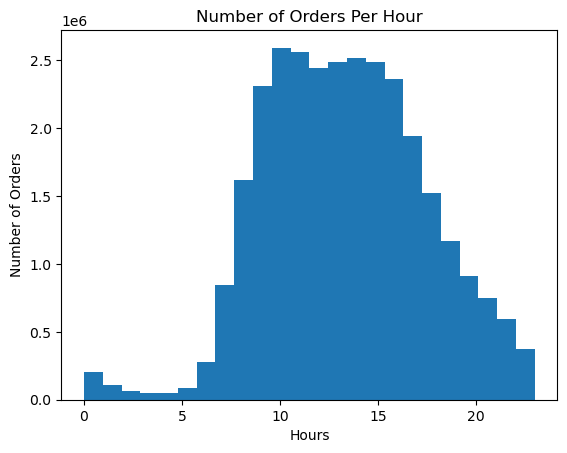

In [10]:
# Creating a histogram
hist = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

plt.title('Number of Orders Per Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Orders')

##### This histogram demonstrates most orders occur between 9 AM and 4 PM, with a clear peak around 10 AM to 12 PM. Very few orders are placed late at night or early in the morning (e.g. 0–5 AM). There’s a steady drop-off after 5 PM, with fewer orders in the evening.

In [11]:
df_ords_prods_all['order_hour_of_day'].max()

23.0

#### 03. Creating Bar Charts

Text(0, 0.5, 'Number of Customers')

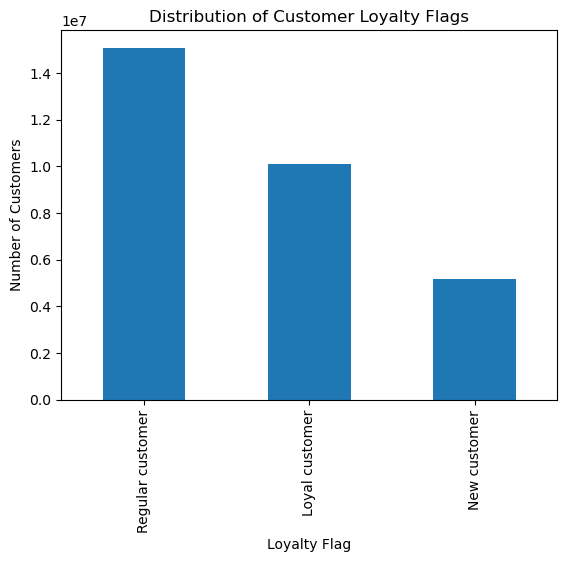

In [12]:
# Create bar chart 
bar = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

plt.title('Distribution of Customer Loyalty Flags')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Customers')

##### Regular customers make up the largest group, followed by Loyal customers. This suggests that the business has a strong base of returning customers — both regular and loyal — which is a positive sign of customer retention. The smaller number of new customers could suggest either a potential area for marketing growth, or that once new customers join, they tend to return and become regular or loyal customers.

#### 04. Creating Line Charts via Sampling

In [13]:
# Creating a list holding True/Fake values to the test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [14]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [15]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [16]:
# Confirming what length of outsput should be
len(df_ords_prods_all)

30328763

In [17]:
# Checking what length of output created is 
len(big) + len(small)

30328763

In [18]:
# Check output
df_ords_prods_all.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_order,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Busiest days,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer


In [19]:
# View all columns
print(df_ords_prods_all.columns.tolist())

['user_id', 'first_name', 'surname', 'gender', 'state', 'age', 'date_joined', 'number_of_dependants', 'family_status', 'income', 'order_id', 'dataset_label', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_spending', 'spending_flag', 'median_order', 'order_frequency_flag']


In [20]:
# Reduce sample to only necessary columns
df_2 = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Prices')

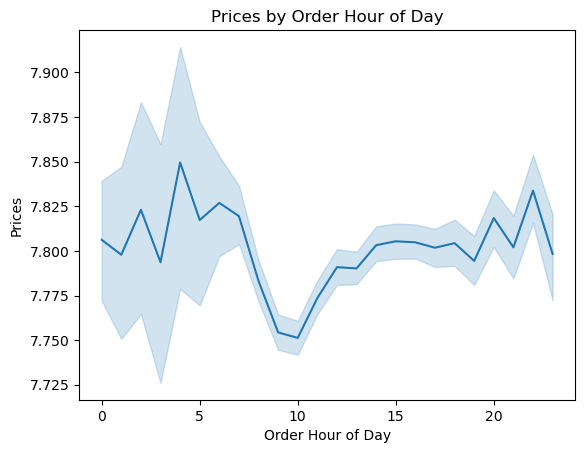

In [21]:
# Create line chart
line1 = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

plt.title('Average Prices by Order Hour of Day')
plt.xlabel('Order Hour of Day')
plt.ylabel('Prices')

##### This line chart shows that product prices remain relatively stable throughout the day, generally ranging between 7.75 and 7.90 dollars. There is slightly greater variability during the early morning hours (12 AM to 6 AM), which can make the averages less reliable. Prices dip slightly in the late morning (around 10–11 AM), possibly because fewer people shop during typical working hours. In the afternoon, prices level out and remain consistent, with a modest increase again in the evening.

#### 05. Exploratory Analysis via Line Chart

In [22]:
# Reduce sample to only necessary columns
df_2 = small[['age','number_of_dependants']]

Text(0, 0.5, 'Number of Dependants')

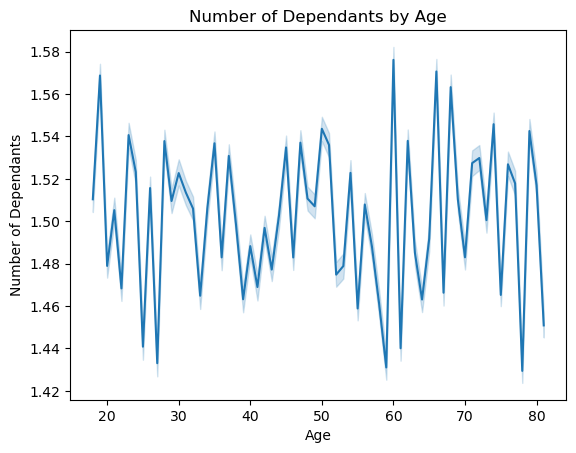

In [23]:
# Create line chart
line2 = sns.lineplot(data = df_2, x = 'age',y = 'number_of_dependants')

plt.title('Number of Dependants by Age')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')

##### The number of dependants fluctuates across all age groups but remains within a narrow range (roughly between 1.42 and 1.58). The average being around 1.5 suggests that dependants are relatively common, but most people don’t have very large families. 

#### 06. Creating Scatter Plots

In [24]:
# Reduce sample to only necessary columns
df_3 = small[['age','income']]

Text(0, 0.5, 'Income')

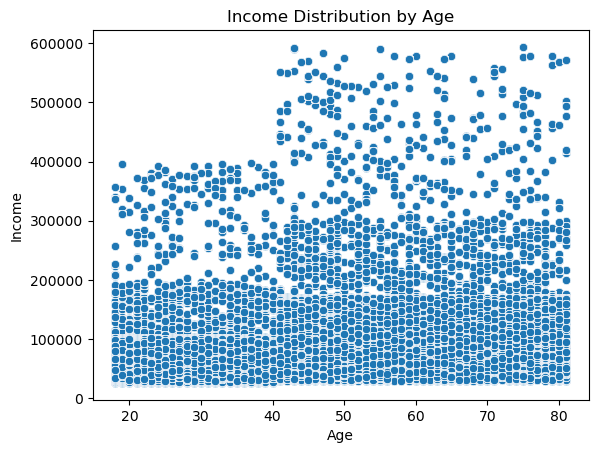

In [25]:
# Create a scatterplot 
scatter = sns.scatterplot(x = 'age', y = 'income', data = df_3)

plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Income')

##### At nearly every age, particularly from 25 to 75, there is a broad spread of income values. You can see a noticeable concentration of high earners (over 400,000) appearing more often around the 40–60 age range, aligning with typical career progression often in mid-to-late career. Most data points fall under the 200,000 income mark, showing that a majority earn below this threshold regardless of age. The overall pattern shows a high variance of income across all age groups.

#### 07. Export Visualisations

In [26]:
# Export histogram as a png
hist.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'histogram_orders_hod.png'))

In [27]:
# Export bar chart as a png
bar.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_loyalty_flag.png'))

In [28]:
# Export line chart 1 as a png
line1.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'line1_orders_hod.png'))

In [29]:
# Export histogram as a png
line2.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'line2_orders_dependants.png'))

In [30]:
# Export scatte plot as a png
scatter.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'scatter_income.png'))